# The Effects of Aerobic Excercise On Tear Production

## Introduction

This analysis aims to study the effects of aerobic exercise on the producion of tear. This aims to establish whether aerobic exercises will improve the production of tear in patients with dry eyes.

There are three datasets available for this study, each recording the observed variaions in tear production with respect to the time of exercise:
- DATA FOR NON-ATHLETE BEFORE EXERCISE.xlsx
- DATA FOR NON-ATHLETE DURING EXERCISE.xlsx
- DATA FOR NON-ATHLETE AFTER EXERCISE.xlsx

In [1]:
import numpy as np
import pandas as pd

import pingouin
from scipy.stats import t

import matplotlib.pyplot as plt
import seaborn as sns

## Data Extraction

First of all, let's extract the needed columns from the dataset. From previous assessment of the datasets, I found only the following columns in all the datasets necessary for our analysis:
- NAME
- TEAR VOLUME

The following columns from the `DATA FOR NON-ATHLETE BEFORE EXERCISE.xlsx` may as well be useful for our analysis.
- SEX
- AGE
- WEIGHT
- HEIGHT
- WAIST CIRCUMFERENCE
- BMI

The stated columns from the individual datasets would be extracted into the following pandas `DataFrame`s respectively corresponding to the times the datasets were collected with respect to the time of exercise:
- **`before`**
- **`during`**
- **`after`**

In [2]:
before = pd.read_excel('Copy of DATA BEFORE_EXERCISE-1(1).xlsx')
before.head()

,NAME,SEX,AGE,TEAR VOLUME
0,YUSUF OPEYEMI,F,20,25
1,DAVID GIFT,F,23,7
2,OGBE OCHANYE BLESSING,F,24,7
3,ADEYEMI AYOYEMI WURAOLA,F,22,12
4,OLAOYE OLASILE .O.,F,24,20


**This is the data collected before exercise.**

In [3]:
before

,NAME,SEX,AGE,TEAR VOLUME
0,YUSUF OPEYEMI,F,20,25
1,DAVID GIFT,F,23,7
2,OGBE OCHANYE BLESSING,F,24,7
3,ADEYEMI AYOYEMI WURAOLA,F,22,12
4,OLAOYE OLASILE .O.,F,24,20
5,AMEH FELIX,M,24,21
6,POPOOLA FOLASHADE ABIGAIL,F,19,30
7,JACOB OLAMIDE CHRISTIANA,F,26,29
8,ABDULKAREEM ROFIAT,F,21,10
9,APAOKAGI FATIMAH,F,20,35


In [4]:
during = pd.read_excel('Copy of DATA_FOR DURING_EXERCISE-1(1).xlsx', usecols=['NAME', 'TEAR VOLUME'])
during.head()

,NAME,TEAR VOLUME
0,YUSUF OPEYEMI,15
1,DAVID GIFT,19
2,OGBE OCHANYE BLESSING,6
3,ADEYEMI AYOYEMI WURAOLA,8
4,OLAOYE OLASILE .O.,11


**This is the data collected during exercise.**

In [5]:
during

,NAME,TEAR VOLUME
0,YUSUF OPEYEMI,15
1,DAVID GIFT,19
2,OGBE OCHANYE BLESSING,6
3,ADEYEMI AYOYEMI WURAOLA,8
4,OLAOYE OLASILE .O.,11
5,AMEH FELIX,24
6,POPOOLA FOLASHADE ABIGAIL,25
7,JACOB OLAMIDE CHRISTIANA,28
8,ABDULKAREEM ROFIAT,13
9,APAOKAGI FATIMAH,24


In [6]:
after = pd.read_excel('Copy of DATA_AFTER_EXERCISE-1(2).xlsx', usecols=['NAME', 'TEAR VOLUME'])
after.head()

,NAME,TEAR VOLUME
0,YUSUF OPEYEMI,21
1,DAVID GIFT,25
2,OGBE OCHANYE BLESSING,6
3,ADEYEMI AYOYEMI WURAOLA,30
4,OLAOYE OLASILE .O.,6


**This is the data collected after exercise.**

In [7]:
after

,NAME,TEAR VOLUME
0,YUSUF OPEYEMI,21
1,DAVID GIFT,25
2,OGBE OCHANYE BLESSING,6
3,ADEYEMI AYOYEMI WURAOLA,30
4,OLAOYE OLASILE .O.,6
5,AMEH FELIX,23
6,POPOOLA FOLASHADE ABIGAIL,22
7,JACOB OLAMIDE CHRISTIANA,1
8,ABDULKAREEM ROFIAT,11
9,APAOKAGI FATIMAH,35


The data would be combined into a single dataframe stored as **`data`** to effectively work with the datasets.

In [8]:
data = before.merge(during, on='NAME', suffixes=('_BEFORE', '_DURING')).merge(after, on='NAME')
data.rename(columns=lambda x: 'tear_volume_after' if x == 'TEAR VOLUME' else x.lower().replace(' ', '_'), inplace=True)
data.head()

,name,sex,age,tear_volume_before,tear_volume_during,tear_volume_after
0,YUSUF OPEYEMI,F,20,25,15,21
1,DAVID GIFT,F,23,7,19,25
2,OGBE OCHANYE BLESSING,F,24,7,6,6
3,ADEYEMI AYOYEMI WURAOLA,F,22,12,8,30
4,OLAOYE OLASILE .O.,F,24,20,11,6


In [9]:
data

,name,sex,age,tear_volume_before,tear_volume_during,tear_volume_after
0,YUSUF OPEYEMI,F,20,25,15,21
1,DAVID GIFT,F,23,7,19,25
2,OGBE OCHANYE BLESSING,F,24,7,6,6
3,ADEYEMI AYOYEMI WURAOLA,F,22,12,8,30
4,OLAOYE OLASILE .O.,F,24,20,11,6
5,AMEH FELIX,M,24,21,24,23
6,POPOOLA FOLASHADE ABIGAIL,F,19,30,25,22
7,JACOB OLAMIDE CHRISTIANA,F,26,29,28,1
8,ABDULKAREEM ROFIAT,F,21,10,13,11
9,APAOKAGI FATIMAH,F,20,35,24,35


## Gender Distribution

**There's an equal count of both genders in the dataset.**

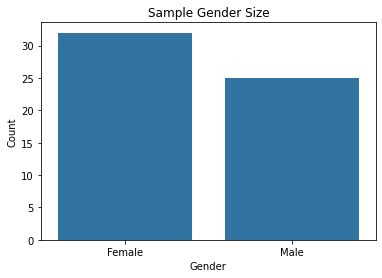

In [10]:
sns.countplot(data=data, x='sex', color=sns.color_palette()[0])
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Sample Gender Size');

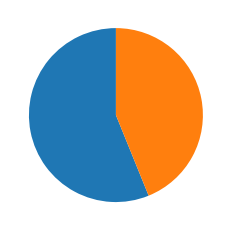

In [11]:
plt.pie(data['sex'].value_counts(), startangle=90);

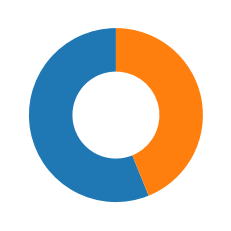

In [12]:
plt.pie(data['sex'].value_counts(), startangle=90, wedgeprops={'width': 0.5});

## Age Distribution

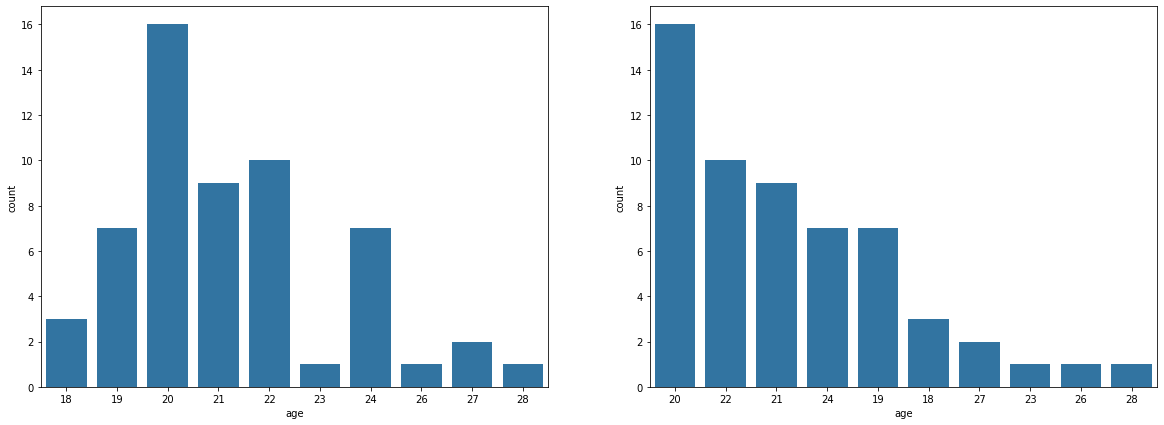

In [13]:
plt.figure(figsize=[20, 7])
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='age', color=sns.color_palette()[0])
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='age', order=data['age'].value_counts().index, color=sns.color_palette()[0]);

## Exploring Tear Volume Production

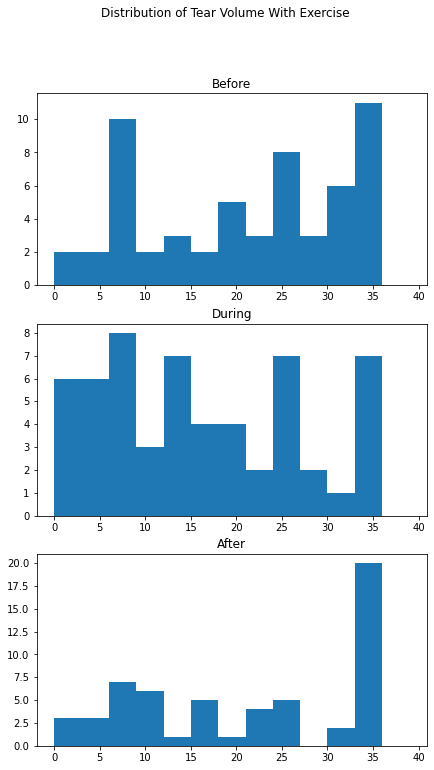

In [14]:
plt.figure(figsize=[7, 12])
plt.subplot(3, 1, 1)
plt.hist(data['tear_volume_before'], bins=np.arange(0, 40, 3))
plt.title('Before')
plt.subplot(3, 1, 2)
plt.hist(data['tear_volume_during'], bins=np.arange(0, 40, 3))
plt.title('During')
plt.subplot(3, 1, 3)
plt.hist(data['tear_volume_after'], bins=np.arange(0, 40, 3));
plt.title('After')
plt.suptitle('Distribution of Tear Volume With Exercise');

The visual shows that there are few dry eye persons in the dataset. That is, their tear production volume is between $0$ and $10$ $mg^3$.

Majority of the people in this dataset have a tear production volume greater than $10 mg^3$.

To see the categories of persons in this dataset based on their tear producton volume, the tear production volume before exercise would be split into two groups:
- The dry eye type (tear volume before exercise less than or equal to $10mg^3$)
- The normal eye type (tear production volume greater than $10mg^3$)

This category would be indicated in the **`eye_type`** column of the **`data`** `DataFrame`.

In [15]:
data['eye_type'] = pd.cut(data['tear_volume_before'], bins=[0, 10, 40], labels=['dry', 'normal'], ordered=False)
data.head()

,name,sex,age,tear_volume_before,tear_volume_during,tear_volume_after,eye_type
0,YUSUF OPEYEMI,F,20,25,15,21,normal
1,DAVID GIFT,F,23,7,19,25,dry
2,OGBE OCHANYE BLESSING,F,24,7,6,6,dry
3,ADEYEMI AYOYEMI WURAOLA,F,22,12,8,30,normal
4,OLAOYE OLASILE .O.,F,24,20,11,6,normal


In [16]:
data

,name,sex,age,tear_volume_before,tear_volume_during,tear_volume_after,eye_type
0,YUSUF OPEYEMI,F,20,25,15,21,normal
1,DAVID GIFT,F,23,7,19,25,dry
2,OGBE OCHANYE BLESSING,F,24,7,6,6,dry
3,ADEYEMI AYOYEMI WURAOLA,F,22,12,8,30,normal
4,OLAOYE OLASILE .O.,F,24,20,11,6,normal
5,AMEH FELIX,M,24,21,24,23,normal
6,POPOOLA FOLASHADE ABIGAIL,F,19,30,25,22,normal
7,JACOB OLAMIDE CHRISTIANA,F,26,29,28,1,normal
8,ABDULKAREEM ROFIAT,F,21,10,13,11,dry
9,APAOKAGI FATIMAH,F,20,35,24,35,normal


**There are just a quarter persons (7) with *dry eye* type in this dataset.**

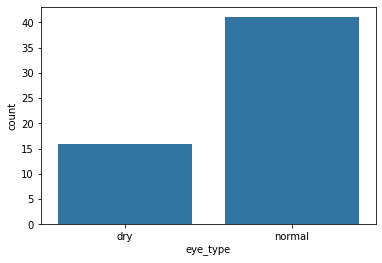

In [17]:
sns.countplot(data=data, x='eye_type', color=sns.color_palette()[0]);

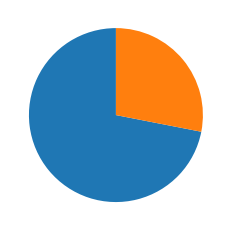

In [18]:
plt.pie(data['eye_type'].value_counts(), startangle=90);

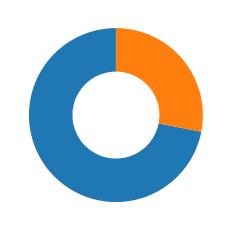

In [19]:
plt.pie(data['eye_type'].value_counts(), startangle=90, wedgeprops={'width': 0.5});

### Analysing The Effects of Aerobic Exercise On Tear Volume Production

In [20]:
tear_data = pd.melt(data, id_vars=['name', 'eye_type'],
        value_vars=['tear_volume_before', 'tear_volume_during', 'tear_volume_after'],
        var_name='exercise_time', value_name='tear_volume').replace(r'tear_volume_', '', regex=True).loc[:, 'eye_type': 'tear_volume']
        
tear_data['exercise_time'] = tear_data['exercise_time'].str.title()
tear_data

,eye_type,exercise_time,tear_volume
0,normal,Before,25
1,dry,Before,7
2,dry,Before,7
3,normal,Before,12
4,normal,Before,20
...,...,...,...
166,normal,After,11
167,normal,After,35
168,normal,After,35
169,dry,After,6


**As observed from the visualization below, there is generally an improvement in tear production volume for persons with dry eyes upon exercise and after exercise as suggested by the dataset.**

**There also seem to be a decline in tear production volume for persons with normal eyes upon exercise followed by an improvement in tear production volume after exercise.**

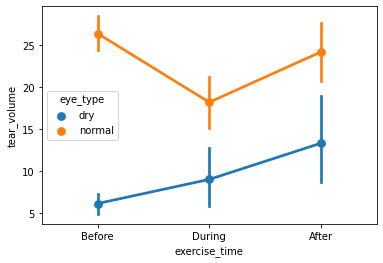

In [21]:
sns.pointplot(data=tear_data, x='exercise_time', y='tear_volume', hue='eye_type');

To explore the difference in tear production volume with respect to time of exercise (before, during, or after), we would add two columns indicating the difference during and after exercise.

In [22]:
data['vol_diff_during'] = data['tear_volume_during'] - data['tear_volume_before']
data['vol_diff_after'] = data['tear_volume_after'] - data['tear_volume_before']
data.head()

,name,sex,age,tear_volume_before,tear_volume_during,tear_volume_after,eye_type,vol_diff_during,vol_diff_after
0,YUSUF OPEYEMI,F,20,25,15,21,normal,-10,-4
1,DAVID GIFT,F,23,7,19,25,dry,12,18
2,OGBE OCHANYE BLESSING,F,24,7,6,6,dry,-1,-1
3,ADEYEMI AYOYEMI WURAOLA,F,22,12,8,30,normal,-4,18
4,OLAOYE OLASILE .O.,F,24,20,11,6,normal,-9,-14


In [23]:
data

,name,sex,age,tear_volume_before,tear_volume_during,tear_volume_after,eye_type,vol_diff_during,vol_diff_after
0,YUSUF OPEYEMI,F,20,25,15,21,normal,-10,-4
1,DAVID GIFT,F,23,7,19,25,dry,12,18
2,OGBE OCHANYE BLESSING,F,24,7,6,6,dry,-1,-1
3,ADEYEMI AYOYEMI WURAOLA,F,22,12,8,30,normal,-4,18
4,OLAOYE OLASILE .O.,F,24,20,11,6,normal,-9,-14
5,AMEH FELIX,M,24,21,24,23,normal,3,2
6,POPOOLA FOLASHADE ABIGAIL,F,19,30,25,22,normal,-5,-8
7,JACOB OLAMIDE CHRISTIANA,F,26,29,28,1,normal,-1,-28
8,ABDULKAREEM ROFIAT,F,21,10,13,11,dry,3,1
9,APAOKAGI FATIMAH,F,20,35,24,35,normal,-11,0


The change in tear production for persons with dry eyes is of more interest in this analysis. Therefore, further analysis would be performed on the subset of the data for persons with dry eyes.

In [24]:
dry_eye_data = data.loc[data['eye_type'] == 'dry'].reset_index(drop=True)
dry_eye_data

,name,sex,age,tear_volume_before,tear_volume_during,tear_volume_after,eye_type,vol_diff_during,vol_diff_after
0,DAVID GIFT,F,23,7,19,25,dry,12,18
1,OGBE OCHANYE BLESSING,F,24,7,6,6,dry,-1,-1
2,ABDULKAREEM ROFIAT,F,21,10,13,11,dry,3,1
3,AJIBOWU TAIWO,M,24,9,4,5,dry,-5,-4
4,OLAGUNJU JAMES,M,27,8,12,35,dry,4,27
5,ADELAKIN YUSUF,M,28,6,18,2,dry,12,-4
6,AREMU IYIOLA,M,27,2,5,7,dry,3,5
7,ADEBAYO MICHAEL,M,21,6,4,6,dry,-2,0
8,CHUKWUEMEKA STEPAHNIE,F,19,3,12,10,dry,9,7
9,IGBOANUGGOUDE UGOCHINYEREM,F,19,4,28,35,dry,24,31


**The average improvement of tear volume production of dry eye persons after exercise as compared with before exercise is:**

In [25]:
dry_eye_data['vol_diff_after'].mean()

7.1875

In [26]:
np.random.seed(10)

bootstrap_dist = []

for _ in range(10000):
    df_sample = dry_eye_data.sample(frac=1, replace=True)
    sample_mean = df_sample['vol_diff_after'].mean()
    bootstrap_dist.append(sample_mean)

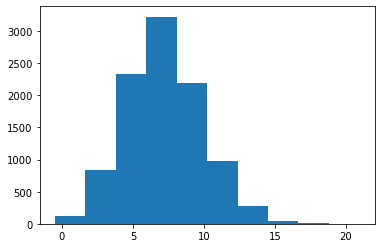

In [27]:
plt.hist(bootstrap_dist);

**The simulated bootstrap suggest the populaton has an average difference in tear volume after exercise of:**

In [28]:
boot_mean = np.mean(bootstrap_dist)
boot_mean

7.170325

**We are 95% confident that the average difference of tear production volume after exercise lies between the following values:**

In [29]:
np.quantile(bootstrap_dist, 0.025), np.quantile(bootstrap_dist, 0.975)

(2.3125, 12.6875)

In [30]:
std_err = np.std(bootstrap_dist, ddof=1)
std_err

2.6470398115350258

In [31]:
pop_std = std_err * np.sqrt(len(dry_eye_data))
pop_std

10.588159246140103

**The null hypothesis states that aerobic exercise has no effect on tear production. That is, the average difference in tear production is 0.**

**The alternative hypothesis states otherwise, that aerobic exercise improves tear production for persons with dry eye. That is, the average difference in tear production is greater than 0.**
$$H_0: \mu_{diff} = \mu_{after} - \mu_{before} = 0$$
$$H_{alt}: \mu_{diff} = \mu_{after} - \mu_{before} > 0$$

A significance level of $\alpha = 0.05$ is set. 

Since we are comparing the same population against itself, a **paired T-test** would be used to see the significance if the effect of aerobic exercise on tear production for persons with dry eyes.

The test-statistic *t*, for a paired t-test is calaculated using the following formula:
$$t = \frac{\mu_{after} - \mu_{before}}{standard\ error} = \frac{\mu_{diff}}{standard\ error}$$

Where:
> $\mu_{diff}$ = difference in tear volume before and after exercise from the sample.

> standard error is given by:
$$SE \approx \sqrt{\frac{s_{diff}^2}{n_{diff}}}$$

Where $s_{diff}$ is the standard deviation of the difference in tear production from the sample and $n_{diff}$ is the number of observations in the sample

**The calculated test statistic _t_ is**

In [32]:
diff_mean = dry_eye_data['vol_diff_after'].mean()
diff_std = dry_eye_data['vol_diff_after'].std()
diff_n = len(dry_eye_data)
t_stat = diff_mean/np.sqrt((diff_std**2)/diff_n)
t_stat

2.630034635812107

This gives a *p-value* of:

In [33]:
p_value = 1 - t.cdf(t_stat, df=diff_n - 1)
p_value

0.009465609330349678

The _p-value_ can easily be obtained using the pingouin package:

In [34]:
pingouin.ttest(x=dry_eye_data['vol_diff_after'],
               y=0,
               alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.630035,15,greater,0.009466,"[2.4, inf]",0.657509,6.494,0.806133


In [35]:
pingouin.ttest(x=dry_eye_data['tear_volume_after'],
               y=dry_eye_data['tear_volume_before'],
               paired=True,
               alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.630035,15,greater,0.009466,"[2.4, inf]",0.915974,6.494,0.967615


## Conclusion

**From all the methods, the same p-value of 0.01964 which is less than the significance level $(\alpha = 0.05)$ was obtained.**

**Therefore, from the result of the analysis, we _REJECT_ the null hypothesis which states that aerobic exercise has no effect on tear production.**